In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
# Create a seaborn palette object
my_palette = sns.color_palette(my_colors)
# Use the custom palette with a seaborn function
sns.set_palette(my_palette)
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #train test division to see the model accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

In [2]:
data = pd.read_csv('laptopData.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [5]:
data.drop(["Unnamed: 0" ],axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


<Figure size 800x600 with 0 Axes>

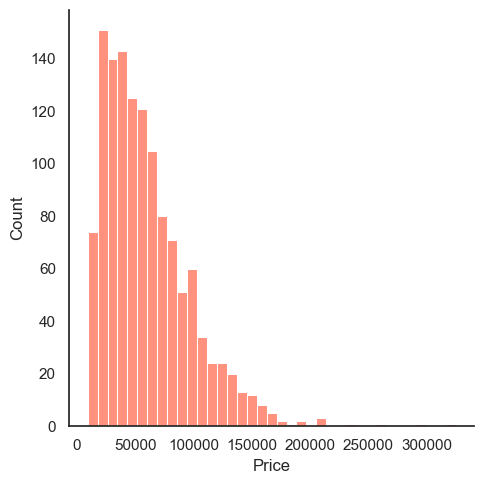

In [7]:
plt.figure(figsize=[8, 6])
sns.displot(data['Price'])
plt.show()

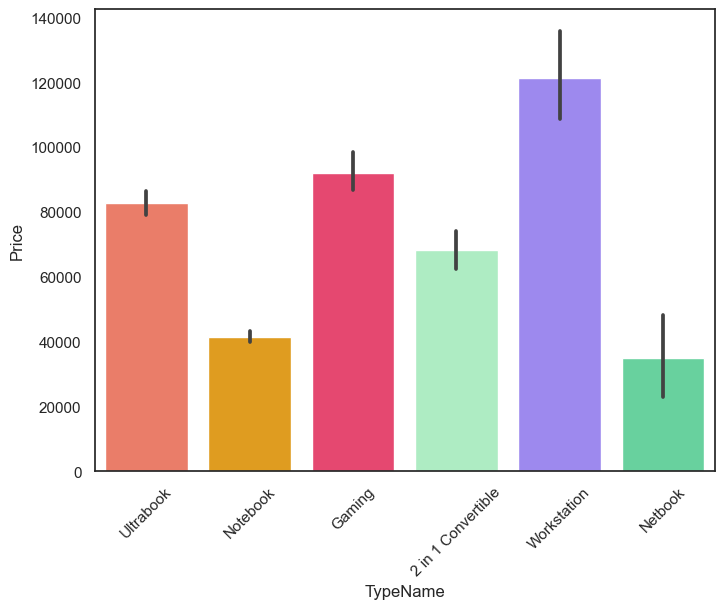

In [8]:
plt.figure(figsize=[8, 6])
sns.barplot(data=data, x='TypeName', y='Price')
plt.xticks(rotation=45)
plt.show()

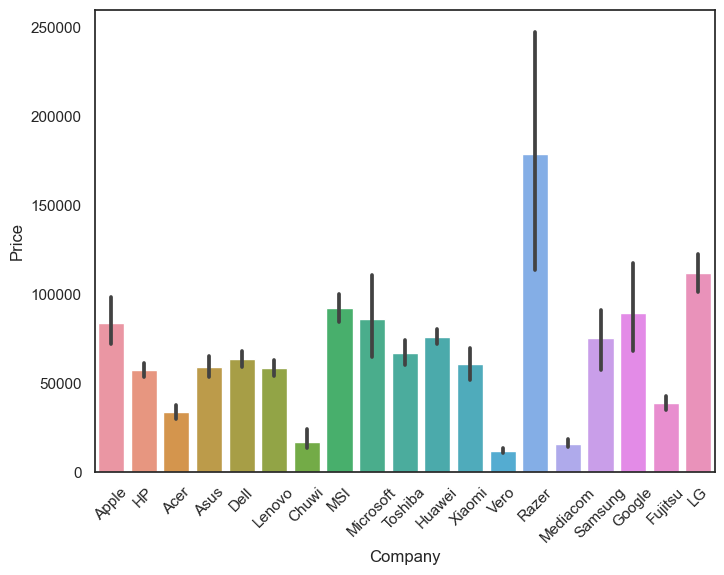

In [9]:
plt.figure(figsize=[8, 6])
sns.barplot(x='Company', y='Price', data=data)
plt.xticks(rotation=45)
plt.show()

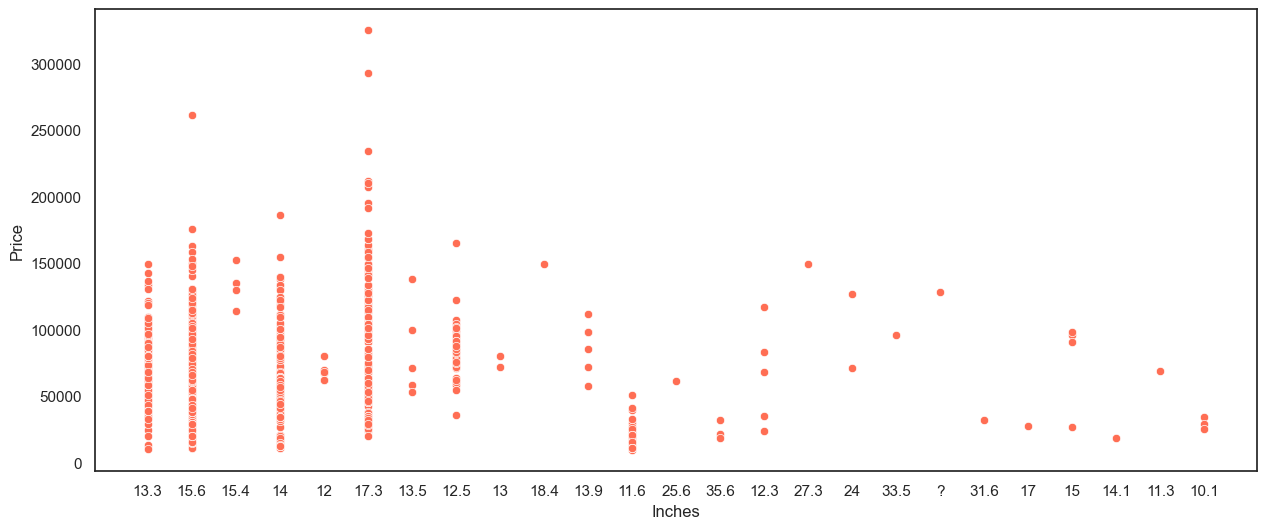

In [10]:
plt.figure(figsize=[15, 6])
sns.scatterplot(data=data, x='Inches',y='Price')
plt.show();

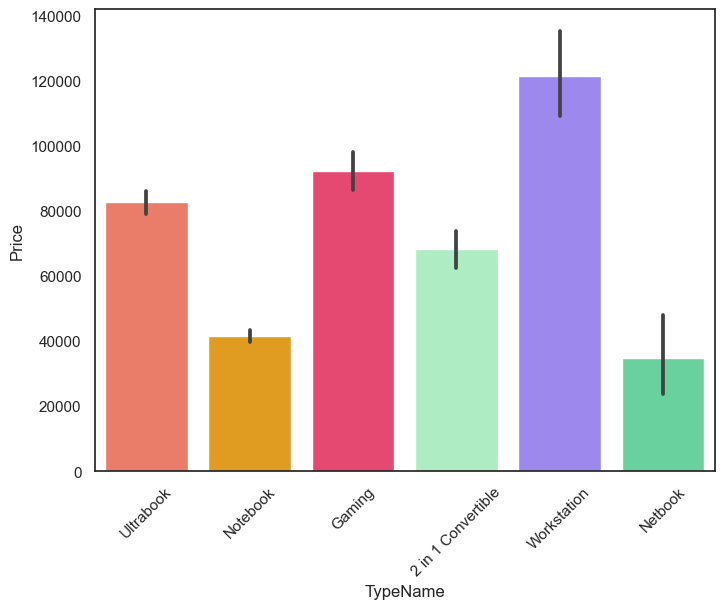

In [11]:
plt.figure(figsize=[8, 6])
sns.barplot(data=data, x='TypeName', y='Price')
plt.xticks(rotation=45)
plt.show()

# DATA CLEANING

In [12]:
# Convert "Weight" to string, remove 'kg', and convert to numeric
data["Weight"] = data["Weight"].astype(str).str.replace('kg', '').apply(pd.to_numeric, errors='coerce')

# Convert "Ram" to string, remove 'GB', and convert to numeric
data["Ram"] = data["Ram"].astype(str).str.replace('GB', '').apply(pd.to_numeric, errors='coerce')

# Convert "Weight" to string, remove 'kg', and convert to numeric
data["Weight"] = data["Weight"].astype(str).str.replace('kg', '').apply(pd.to_numeric, errors='coerce')
data["Weight"] = data["Weight"].replace("?", float("nan")).astype('float')

# Extract integers only
data['MEMORY'] = data['Memory'].astype(str).str.extract('(\d+)').astype(float)

#convert inches to numeric
data['Inches'] = data['Inches'].replace('?', np.nan)
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')

# drop null values
data.dropna(inplace=True)

In [13]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,MEMORY
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1270 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1270 non-null   object 
 1   TypeName          1270 non-null   object 
 2   Inches            1270 non-null   float64
 3   ScreenResolution  1270 non-null   object 
 4   Cpu               1270 non-null   object 
 5   Ram               1270 non-null   float64
 6   Memory            1270 non-null   object 
 7   Gpu               1270 non-null   object 
 8   OpSys             1270 non-null   object 
 9   Weight            1270 non-null   float64
 10  Price             1270 non-null   float64
 11  MEMORY            1270 non-null   float64
dtypes: float64(5), object(7)
memory usage: 129.0+ KB


# CPU COLUMN

In [15]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     127
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [16]:
def fetch_processor(x):
    cpu_name =" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

data['Cpu_brand'] = data['Cpu'].apply(fetch_processor)

In [17]:
#data['CpuBrand'] = data.Cpu.apply(lambda x: str(x).split(" ")[:3] if isinstance(x, str) else None)
data['CpuFrequency'] = data.Cpu.apply(lambda x: str(x).split(" ")[-1] if isinstance(x, str) else None)
data['CpuFrequency'] = data['CpuFrequency'].str[:3]
data.drop(["Cpu" ],axis=1, inplace=True)
#data['CpuBrand'] = data['CpuBrand'].apply(' '.join)

In [18]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,MEMORY,Cpu_brand,CpuFrequency
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,Intel Core i5,2.3


In [19]:
data['Cpu_brand'].value_counts()

Cpu_brand
Intel Core i7            512
Intel Core i5            410
Other Intel Processor    151
Intel Core i3            134
AMD Processor             63
Name: count, dtype: int64

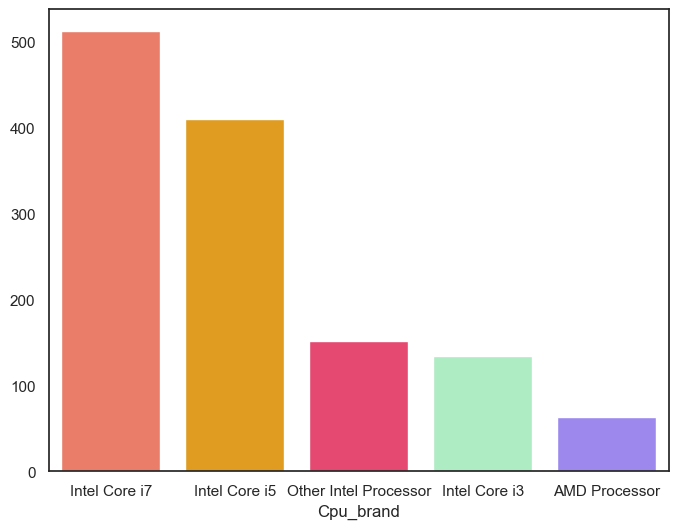

In [20]:
plt.figure(figsize=[8, 6])
value = data['Cpu_brand'].value_counts()
sns.barplot(x=value.index,y=value.values, order=value.index)
#plt.xticks(rotation='vertical')
plt.show()

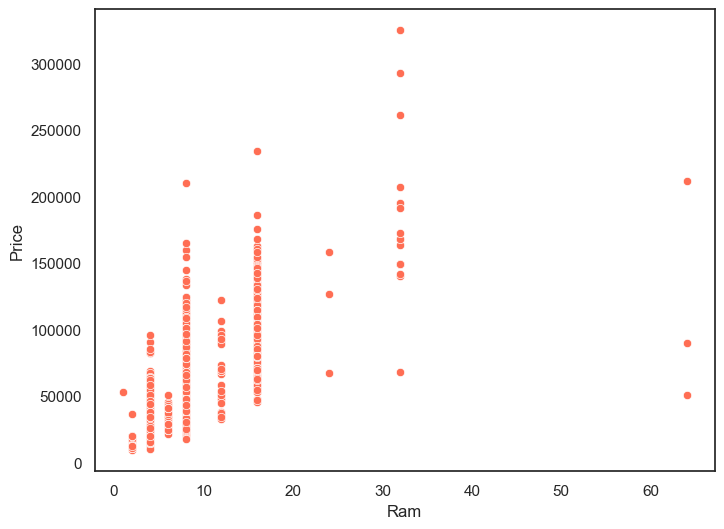

In [21]:
#Price with Ram
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data['Ram'], y=data['Price'])
plt.show()

# SCREEN RESOLUTION

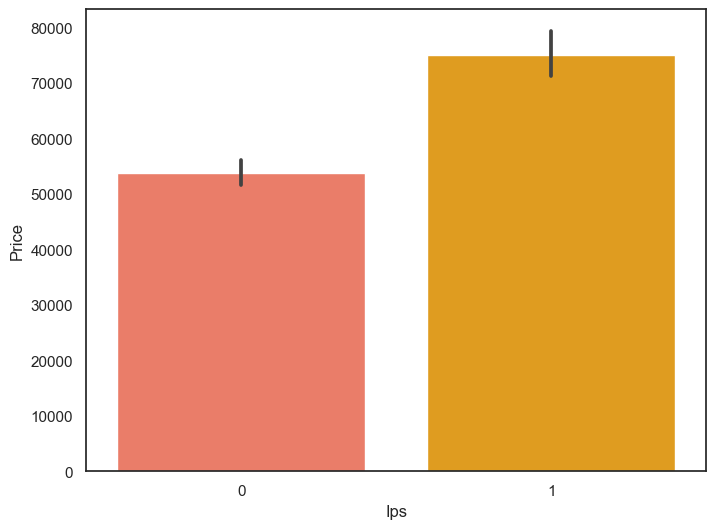

In [22]:
data['Ips'] = data['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'IPS' in x else 0)
plt.figure(figsize=[8, 6])
sns.barplot(x=data['Ips'], y=data['Price']);

<Axes: xlabel='Touchscreen', ylabel='count'>

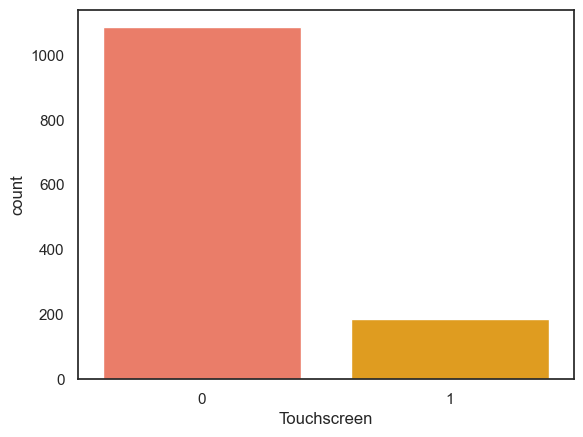

In [23]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and 'Touchscreen' in x else 0)
#how many laptops in data are touchscreen
sns.countplot(x=data['Touchscreen'])

<Axes: xlabel='Touchscreen', ylabel='Price'>

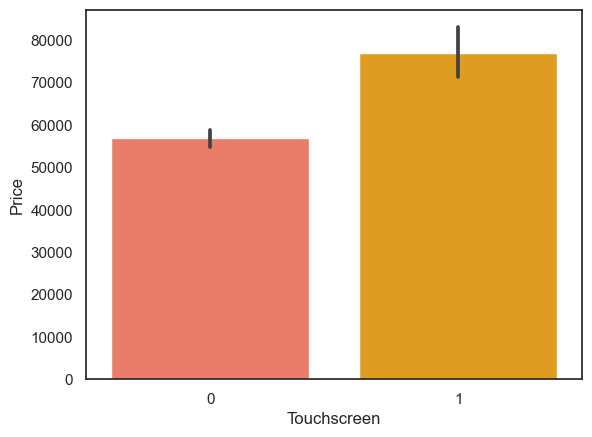

In [24]:
#Plot against price
sns.barplot(x=data['Touchscreen'],y=data['Price'])

In [25]:
data.drop(["ScreenResolution" ],axis=1, inplace=True)
data.head(1)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,MEMORY,Cpu_brand,CpuFrequency,Ips,Touchscreen
0,Apple,Ultrabook,13.3,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,128.0,Intel Core i5,2.3,1,0


# operating system

In [26]:
data['OpSys'].value_counts()

OpSys
Windows 10      1044
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [27]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['OP_SYS'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

In [28]:
data['OP_SYS'].value_counts()

OP_SYS
Windows               1097
Others/No OS/Linux     152
Mac                     21
Name: count, dtype: int64

In [29]:
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,Weight,Price,MEMORY,Cpu_brand,CpuFrequency,Ips,Touchscreen,OP_SYS
0,Apple,Ultrabook,13.3,8.0,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,128.0,Intel Core i5,2.3,1,0,Mac
1,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,128.0,Intel Core i5,1.8,0,0,Mac
2,HP,Notebook,15.6,8.0,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,256.0,Intel Core i5,2.5,0,0,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16.0,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,512.0,Intel Core i7,2.7,1,0,Mac
4,Apple,Ultrabook,13.3,8.0,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,256.0,Intel Core i5,3.1,1,0,Mac


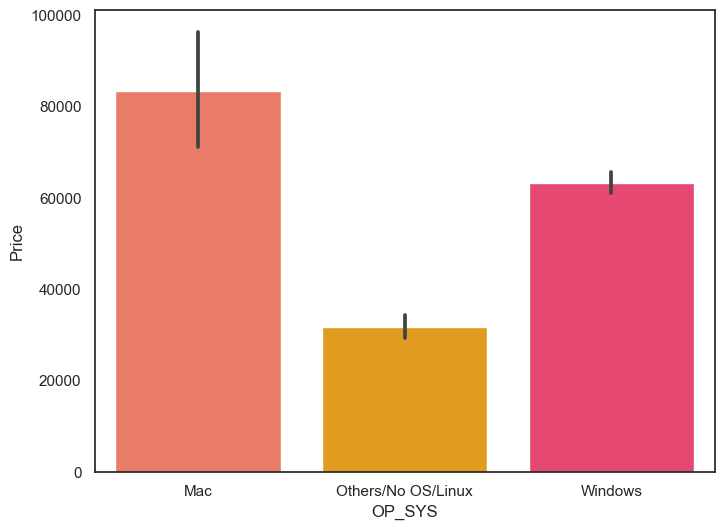

In [30]:
#when you plot price aginst operating system then as usual Mac is most expensive.
plt.figure(figsize=[8, 6])
sns.barplot(x=data['OP_SYS'],y=data['Price'])
plt.show()

# MEMORY

In [31]:
data["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [32]:
data['Storage Type'] = data['Memory'].str.extract('([a-zA-Z\s]+)').squeeze().str.strip()
data['Storage Type'].unique()

array(['GB SSD', 'GB Flash Storage', 'GB HDD', 'TB HDD', 'TB Hybrid',
       'TB SSD', 'GB Hybrid'], dtype=object)

In [35]:
data.drop(columns=['Memory'],inplace=True)
data.head()

,Company,TypeName,Inches,Ram,Gpu,Weight,Price,MEMORY,Cpu_brand,CpuFrequency,Ips,Touchscreen,OP_SYS,Storage Type
0,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 640,1.37,71378.6832,128.0,Intel Core i5,2.3,1,0,Mac,GB SSD
1,Apple,Ultrabook,13.3,8.0,Intel HD Graphics 6000,1.34,47895.5232,128.0,Intel Core i5,1.8,0,0,Mac,GB Flash Storage
2,HP,Notebook,15.6,8.0,Intel HD Graphics 620,1.86,30636.0000,256.0,Intel Core i5,2.5,0,0,Others/No OS/Linux,GB SSD
3,Apple,Ultrabook,15.4,16.0,AMD Radeon Pro 455,1.83,135195.3360,512.0,Intel Core i7,2.7,1,0,Mac,GB SSD
4,Apple,Ultrabook,13.3,8.0,Intel Iris Plus Graphics 650,1.37,96095.8080,256.0,Intel Core i5,3.1,1,0,Mac,GB SSD


In [34]:
for i in data.select_dtypes(exclude='number').columns:
    print(data[i].value_counts())
    print('-' * 100)

Company
Lenovo       290
Dell         284
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
TypeName
Notebook              709
Gaming                203
Ultrabook             190
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Memory
256GB SSD                        399
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD 

# model

In [37]:
X = data.drop(['Price'], axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(exclude='number'))
X_test_encoded = encoder.transform(X_test.select_dtypes(exclude='number'))

In [39]:
# RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_encoded, y_train)

y_pred = rf.predict(X_test_encoded)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 9409.167299688701
Mean Squared Error: 249025803.85039103
Root Mean Squared Error: 15780.551443165446
R-squared: 0.7760372896189522


In [40]:
# XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric=["mae", "rmse"], random_state=42)
xgb_model.fit(X_train_encoded, y_train)

y_pred_xgb = xgb_model.predict(X_test_encoded)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

rmse_xgb = np.sqrt(mse_xgb)
print(f'Root Mean Squared Error (XGBoost): {rmse_xgb}')

r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'R-squared (XGBoost): {r2_xgb}')

Mean Absolute Error (XGBoost): 9095.43259379921
Mean Squared Error (XGBoost): 205553466.30949795
Root Mean Squared Error (XGBoost): 14337.135917242953
R-squared (XGBoost): 0.8151343726991758
